In [230]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [231]:
# df = pd.read_csv('datasets/spaceship/train.csv')
df = pd.read_csv('datasets/spaceship/temp/cabin.csv')
test_df = pd.read_csv('datasets/spaceship/temp/test_cabin.csv')
df = df.drop(columns=['Unnamed: 0'])
test_df = test_df.drop(columns=['Unnamed: 0'])
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cab1,Cab2,Cab3
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,NaN,NaN,NaN
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,NaN,NaN,NaN
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,NaN,NaN,NaN
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,NaN,NaN,NaN


## Converting bool objects into int64

In [232]:
df['Transported'] = df['Transported'].map({True: 1, False: 0})
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
df['VIP'] = df['VIP'].map({True: 1, False: 0})

In [233]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab2
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8494.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,600.367671
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,427.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,999.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1894.000000


In [234]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   float64
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   int64  
 13  Cab1          8494 non-null   object 
 14  Cab2          8494 non-null   float64
 15  Cab3          8494 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 1.1+ MB


## Dispose of useless columns

In [235]:
# train_df = df.drop(columns=['PassengerId', 'FoodCourt', 'ShoppingMall', 'Spa',
#                             'Name', 'Transported', 'RoomService', 'VRDeck', 'Cabin'])
train_df = df.drop(columns=['PassengerId', 'Name', 'Transported'])
answers = df['Transported']
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab1,Cab2,Cab3
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0.0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,F,0.0,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,A,0.0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,A,0.0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,NaN,NaN,NaN
8689,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8690,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,NaN,NaN,NaN
8691,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,NaN,NaN,NaN


## Encoding object values

In [236]:
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])
train_df['Cab1'] = label_encoder.fit_transform(train_df['Cab1'])
train_df['Cab2'] = label_encoder.fit_transform(train_df['Cab2'])
train_df['Cab3'] = label_encoder.fit_transform(train_df['Cab3'])

In [237]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8476 non-null   float64
 2   Destination   8693 non-null   int64  
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   float64
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Cab1          8693 non-null   int64  
 11  Cab2          8693 non-null   int64  
 12  Cab3          8693 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 883.0 KB


In [238]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab1,Cab2,Cab3
0,1,0.0,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0.0,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0.0,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0.0,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0.0,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0.0,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,8,1817,2
8689,0,1.0,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1817,2
8690,0,0.0,2,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,8,1817,2
8691,1,0.0,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,8,1817,2


## Replacing NaN values using sklearn.SimpleImputer

In [239]:
# Saving column names
names = list(train_df.columns)

# Training imputing model
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(train_df)

# Replacing Nan values
train_df = pd.DataFrame(imp_mean.transform(train_df))

# Giving columns their names back
train_df.columns = names
train_df = train_df.join(answers)
train_df.to_csv(path_or_buf='datasets/spaceship/temp/final.csv')

In [240]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Cab1          8693 non-null   float64
 11  Cab2          8693 non-null   float64
 12  Cab3          8693 non-null   float64
 13  Transported   8693 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 950.9 KB


## Training DecisionTreeClassifier on our model

In [241]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=17)
clf_tree.fit(train_df, answers)
print(f"Accuracy: {round(clf_tree.score(train_df, answers), 5) * 100}%")

Accuracy: 100.0%


In [242]:
# Preparing predicted values
predicted = clf_tree.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
8688,0,0
8689,0,0
8690,1,1
8691,0,0


### Parameters for DecisionTreeClassifier

Correlation: 1.0
Mean Squared Error: 0
Accuracy: 100.0%
Tree Depth: 1


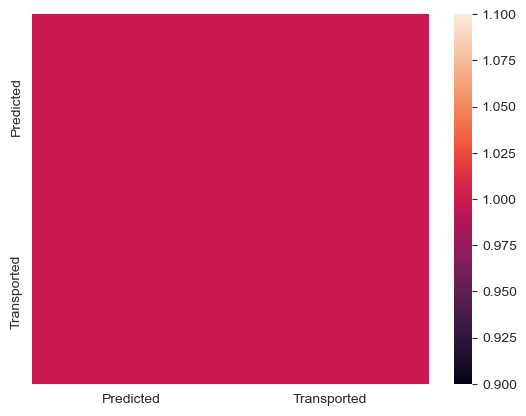

In [243]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Training DecisionTreeRegressor on our model

In [244]:
clf_tree_reg = DecisionTreeRegressor(max_depth=30, random_state=17)
clf_tree_reg.fit(train_df, answers)

DecisionTreeRegressor(max_depth=30, random_state=17)

In [245]:
# Preparing predicted values
predicted = clf_tree_reg.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']
predicted['Predicted'] = predicted['Predicted'].apply(lambda x: round(x))

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
8688,0,0
8689,0,0
8690,1,1
8691,0,0


### Parameters for DecisionTreeRegressor


Correlation: 1.0
Mean Squared Error: 0
Accuracy: 100.0%
Tree Depth: 1


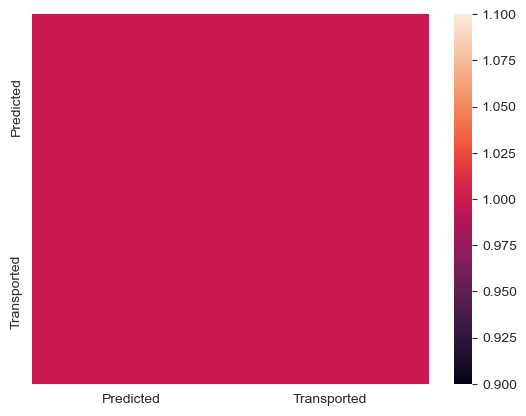

In [246]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")
print(f"Tree Depth: {clf_tree_reg.get_depth()}")

## Training kNN algorithm

In [247]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(train_df, answers)
print(f"Accuracy: {round(neigh.score(train_df, answers), 5) * 100}%")

Accuracy: 80.548%


In [248]:
# Preparing predicted values
predicted = neigh.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,1,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,1,1
8691,0,0


### Parameters for kNN


Correlation: 0.6136803097107969
Mean Squared Error: 1691
Accuracy: 80.548%


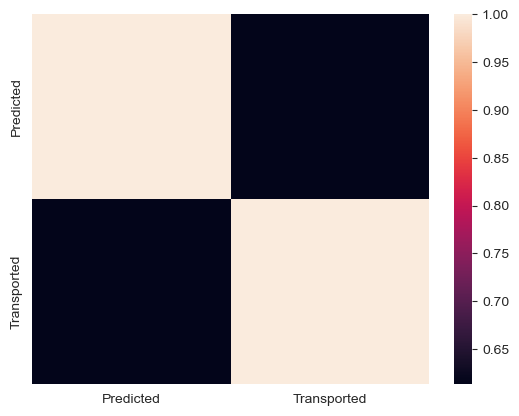

In [249]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")

## Training GradientBoostingClassifier

In [250]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,
                                 max_depth=30, random_state=17)
clf.fit(train_df, answers)
print(f"Accuracy: {round(clf.score(train_df, answers), 5) * 100}%")

Accuracy: 100.0%


In [251]:
# Preparing predicted values
predicted = clf.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
8688,0,0
8689,0,0
8690,1,1
8691,0,0


Correlation: 1.0
Mean Squared Error: 0
Accuracy: 100.0%


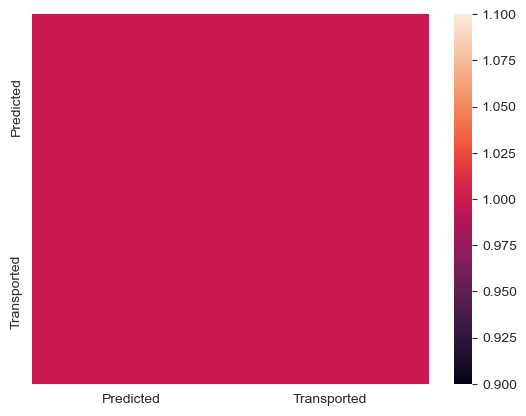

In [252]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")

## Importing Test DataSet

In [254]:
temporary_df = pd.read_csv('datasets/spaceship/test.csv')
test_df
#test_df = test_df.join(temporary_df['PassengerId'])

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cab1,Cab2,Cab3
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,D,296,P
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [ ]:
test_df_ids = test_df['PassengerId']
# test_df = test_df.drop(columns=['PassengerId', 'FoodCourt', 'ShoppingMall', 'Spa',
#                             'Name', 'RoomService', 'VRDeck', 'Cabin'])
test_df = test_df.drop(columns=['PassengerId', 'Name'])

test_df

## Encoding object values

In [ ]:
label_encoder = LabelEncoder()
test_df['HomePlanet'] = label_encoder.fit_transform(test_df['HomePlanet'])
test_df['Destination'] = label_encoder.fit_transform(test_df['Destination'])
test_df['Cab1'] = label_encoder.fit_transform(test_df['Cab1'])
test_df['Cab2'] = label_encoder.fit_transform(test_df['Cab2'])
test_df['Cab3'] = label_encoder.fit_transform(test_df['Cab3'])

## Replacing NaN values using sklearn.SimpleImputer

In [ ]:
# Saving column names
names = list(test_df.columns)

# Training imputing model
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(test_df)

# Replacing Nan values
test_df = pd.DataFrame(imp_mean.transform(test_df))

# Giving columns their names back
test_df.columns = names
test_df.to_csv(path_or_buf='datasets/spaceship/temp/final_test.csv')
test_df

## Trying different model on test DataSet

In [ ]:
ans1 = pd.DataFrame(clf_tree.predict(test_df))
ans1.columns=['Transported']
ans1 = ans1['Transported'].map({1: True, 0: False})
ans1 = pd.DataFrame(test_df_ids).join(ans1)
ans1 = ans1.set_index("PassengerId")
ans1.to_csv(path_or_buf='datasets/spaceship/answers/clf_tree.csv')

In [ ]:
ans2 = pd.DataFrame(clf.predict(test_df))
ans2.columns=['Transported']
ans2 = ans2['Transported'].map({1: True, 0: False})
ans2 = pd.DataFrame(test_df_ids).join(ans2)
ans2 = ans2.set_index("PassengerId")
ans2.to_csv(path_or_buf='datasets/spaceship/answers/gradient_boosting.csv')

### Testing kNN parametrs

In [ ]:
train_df

In [ ]:
algo = ['ball_tree', 'kd_tree', 'brute']
maxx = 0
metric = ['cityblock', 'euclidean', 'manhattan']
for i in range(35,100):
    for j in range(100, 150):
        for k in algo:
            for l in metric:
                knn = KNeighborsClassifier(n_neighbors=i, algorithm=k, leaf_size=j,n_jobs=-1, weights = 'distance', metric=l)
                knn.fit(train_df, answers)
                test = pd.DataFrame(knn.predict(train_df))
                test = test.join(answers)
                if maxx < (1 - metrics.mean_squared_error(test[0],test.Transported)):
                    print(1 - metrics.mean_squared_error(test[0],test.Transported), 'i =', i, 'j =', j, 'algo:', k, 'metrics:', l)
                    maxx = 1 - metrics.mean_squared_error(test[0],test.Transported)